In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import itertools

sb.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sb.set_palette(palette='deep')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

$y = f(x) + \epsilon \newline
f(x) = sin(4\pi x) + sin(7\pi x)$

Text(0.5, 1.0, 'f(x) = sin(4*pi*x)+sin(7*pi*x)')

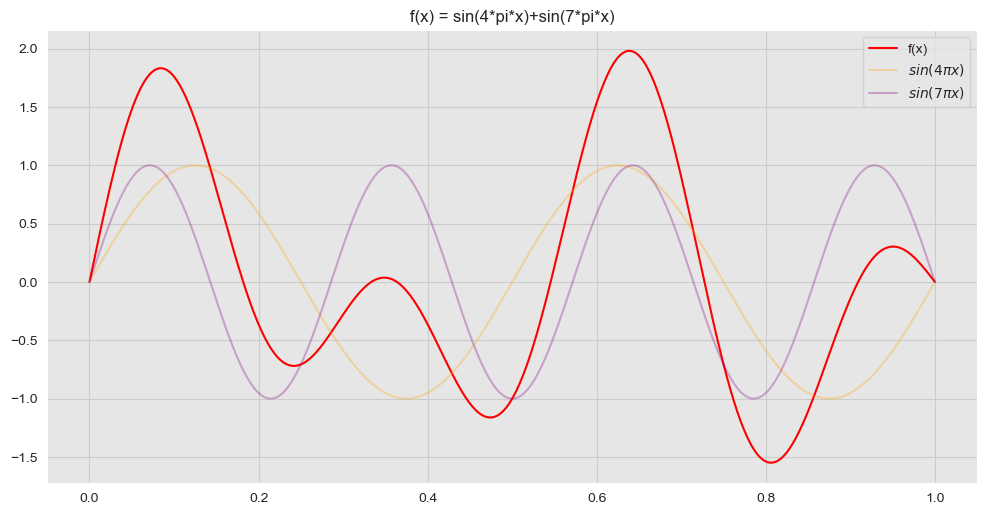

In [2]:
d = 1

def f(x):
    return np.sin(4*np.pi*x) + np.sin(7*np.pi*x)

n = 500

x = np.linspace(0, 1 , n)

f_x = f(x)

fig, ax = plt.subplots()

#plot function f(x)
sb.lineplot(x, f_x, color='red', label = 'f(x)', ax = ax)

#plot function components

sb.lineplot(x, np.sin(4*np.pi*x), color = 'orange', label = '$sin(4\pi x)$', alpha = 0.3, ax = ax)

sb.lineplot(x, np.sin(7*np.pi*x), color = 'purple', label = '$sin(7\pi x)$', alpha = 0.3, ax = ax)

ax.legend(loc='upper right')

ax.set_title('f(x) = sin(4*pi*x)+sin(7*pi*x)')

[Text(0.5, 1.0, 'error distribution')]

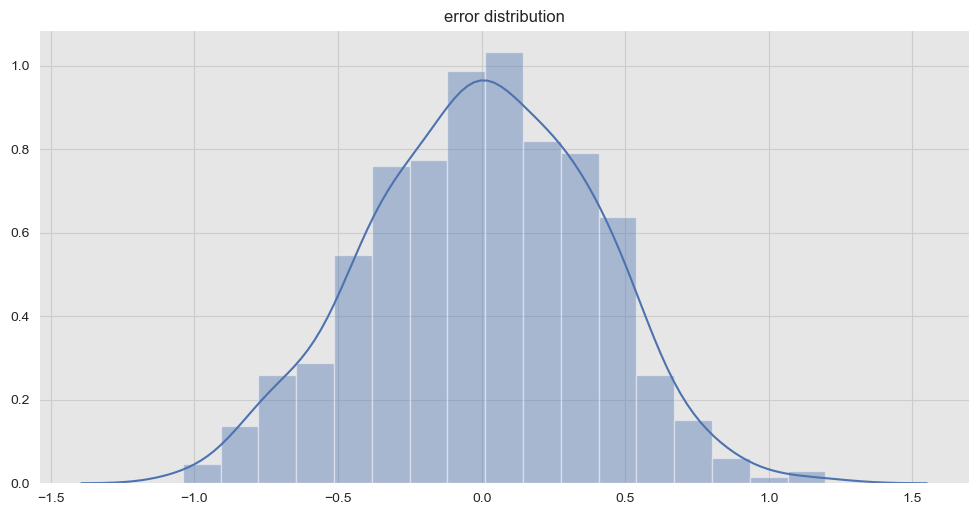

In [3]:
sigma_n = 0.4

epsilon = np.random.normal(0, sigma_n, n)

y = f_x + epsilon

fig, ax = plt.subplots()

sb.distplot(epsilon , ax = ax)
ax.set(title='error distribution')

Text(0.5, 1.0, 'comparison')

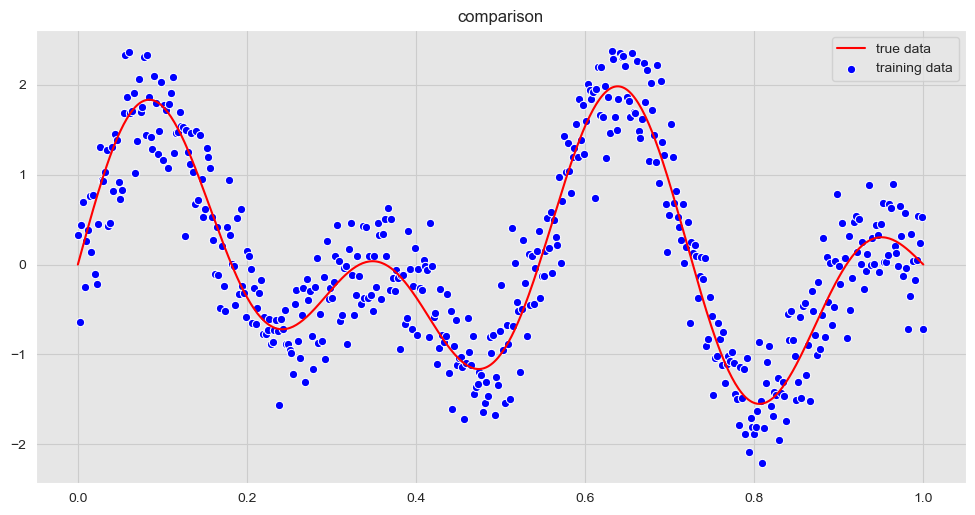

In [4]:
# visualize Plots

fig, ax = plt.subplots()

sb.scatterplot(x, y, color = 'blue', label = 'training data',  ax = ax)

sb.lineplot(x, f_x, color = 'red', label = 'true data', ax = ax)

ax.legend(loc = 'upper right')

ax.set_title('comparison')

In [5]:
n_s = 100

x_s = np.linspace(0, 1, n_s)

$\text{cov}(f(x_p), f(x_q)) = k_{\sigma_f, \ell}(x_p, x_q) = \sigma_f \exp\left(-\frac{1}{2\ell^2} ||x_p - x_q||^2\right)$

In [6]:
def kernel_func(x, y, sigma_f = 1, l = 1):
    
    kernel = sigma_f * np.exp(-(np.linalg.norm(x - y)**2)/(2 * l**2))
    
    return kernel

In [7]:
def compute_cov_matrix(x, x_star, sigma_f=1, l =1):
    
    n = x.shape[0]
    
    n_star = x_star.shape[0]
    
    K = [kernel_func(i, j, sigma_f= sigma_f, l= l) for (i, j) in itertools.product(x,x)]
    
    K = np.array(K).reshape(n, n)
    
    K_star = [kernel_func(i, j, sigma_f= sigma_f, l= l) for (i, j) in itertools.product(x, x_star)]
    
    K_star = np.array(K_star).reshape(n, n_star)
    
    K_star2 = [kernel_func(i, j, sigma_f= sigma_f, l= l) for (i, j) in itertools.product(x_star, x_star)]
    
    K_star2 = np.array(K_star2).reshape(n_star, n_star)
    
    return (K, K_star, K_star2)

In [8]:
K, K_star, K_star2 = compute_cov_matrix(x, x_s, sigma_f=2, l = 0.1)

In [9]:
print(K.shape)

(500, 500)


In [10]:
print(K_star.shape)

(500, 100)


In [11]:
print(K_star2.shape)

(100, 100)


Text(0.5, 1.0, 'Heatmap of K(x,x)')

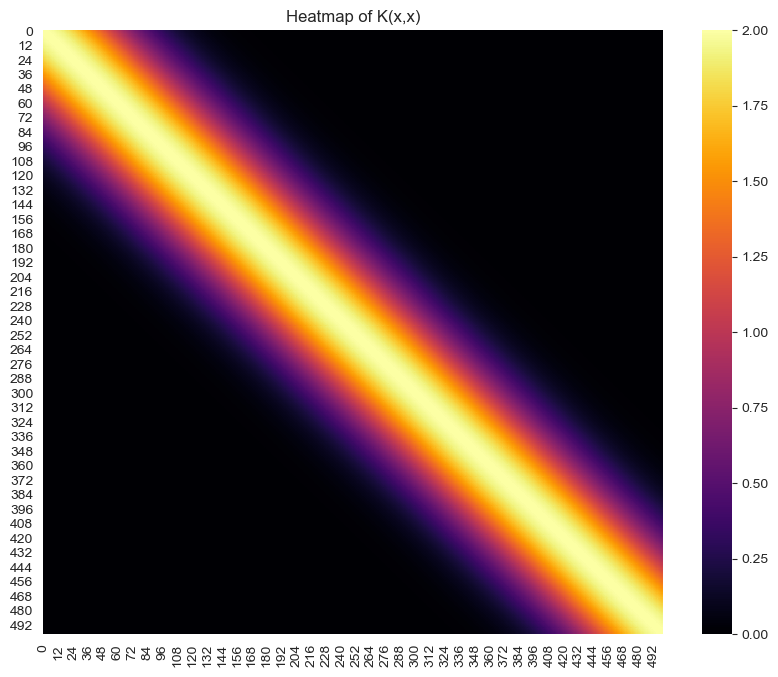

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

sb.heatmap(data = K, cmap='inferno', ax=ax)
ax.set_title('Heatmap of K(x,x)')

Text(0.5, 1.0, 'Heatmap of K(x_s,x)')

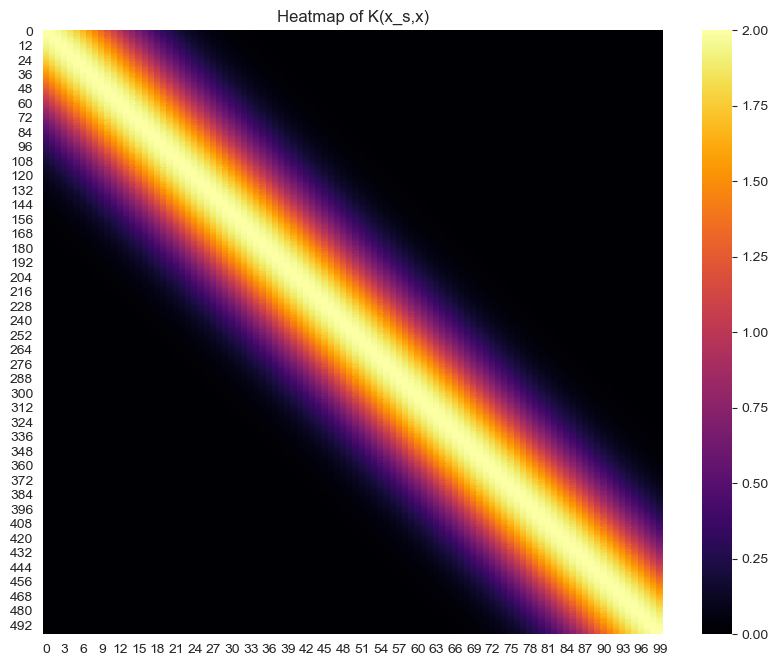

In [13]:
fig, ax = plt.subplots(figsize=(10,8))

sb.heatmap(data = K_star, cmap='inferno', ax=ax)
ax.set_title('Heatmap of K(x_s,x)')

Text(0.5, 1.0, 'Heatmap of K(x_s,x_s)')

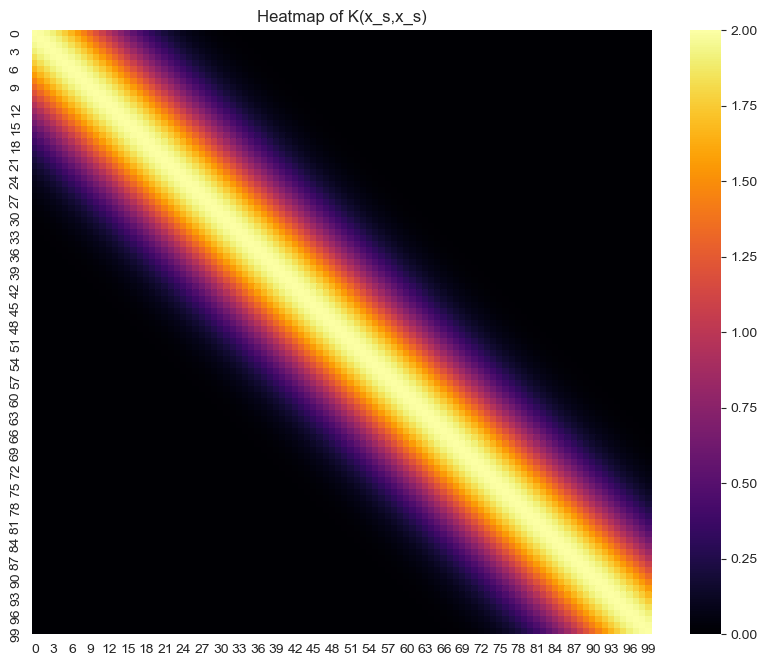

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

sb.heatmap(data = K_star2, cmap='inferno', ax=ax)
ax.set_title('Heatmap of K(x_s,x_s)')

$\left(
\begin{array}{c}
y \\
f_*
\end{array}
\right)
\sim
N(0, C)$

$C = 
\left(
\begin{array}{cc}
K(X, X) + \sigma^2_n I & K(X, X_*) \\
K(X_*, X) & K(X_*, X_*)
\end{array}
\right)$

In [15]:
a = np.concatenate((K+ (sigma_n**2)*np.eye(n), K_star.T), axis = 0)

print(a.shape)

(600, 500)


In [16]:
b = np.concatenate((K_star, K_star2),axis = 0)

print(b.shape)

(600, 100)


In [17]:
C = np.concatenate((a,b), axis = 1)
 
print(C.shape)

(600, 600)


In [18]:
np.all(C.T==C)

#so it is symmetric

True

Text(0.5, 1.0, 'Heatmap of Covariance Matrix C')

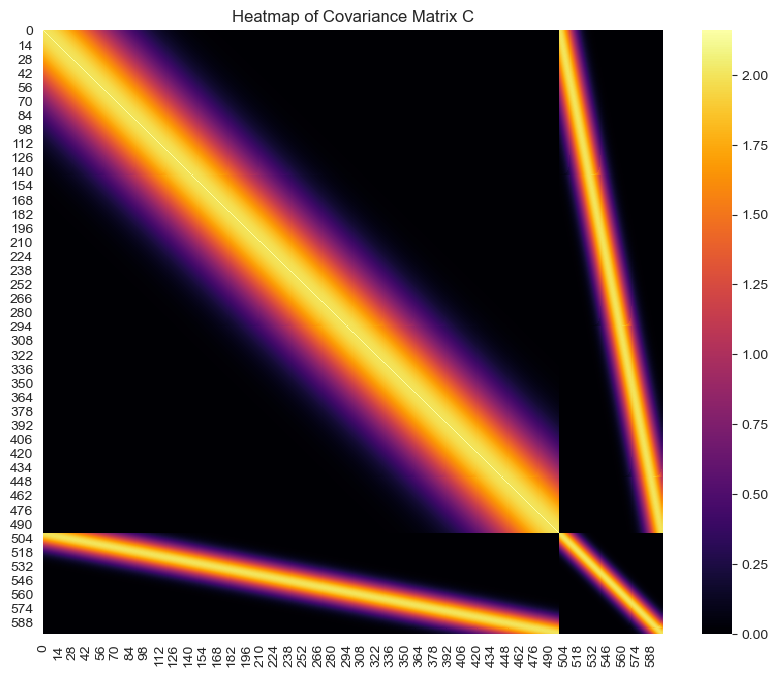

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

sb.heatmap(data = C, cmap='inferno', ax=ax)
ax.set_title('Heatmap of Covariance Matrix C')

#### Prior Distribution for $f_{*}$

$N \sim (0, (K(X_{*}, X_{*}))$

Text(0.5, 1.0, 'Prior distribution of $f(x)$')

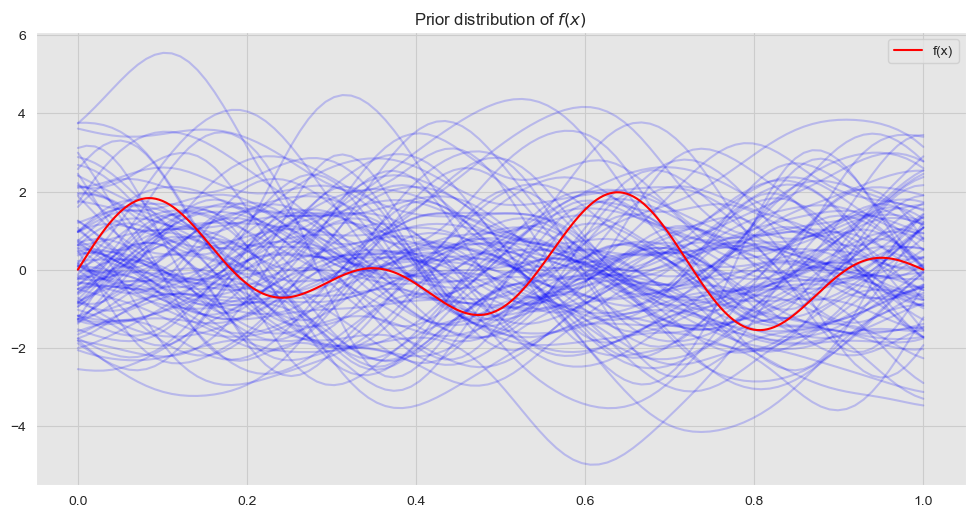

In [20]:
fig, ax = plt.subplots()


for i in range(0, 100):
    
    z_star = np.random.multivariate_normal(mean = np.zeros(n_s), cov = K_star2)
    
    sb.lineplot(x_s, z_star, color = 'blue', alpha = 0.2, ax=ax)
    
sb.lineplot(x, f_x, color = 'red', label = 'f(x)', ax = ax)
ax.set_title('Prior distribution of $f(x)$')

In [21]:
def compute_gpr_parameters(K, K_star, K_star2, sigma_n):
    
    n = K.shape[0]
    
    f_bar_star = np.dot(K_star.T, np.dot(np.linalg.inv(K + (sigma_n**2)* np.eye(n)), y.reshape([n,d])))
    
    cov_f_star = K_star2 - np.dot(K_star.T, np.dot(np.linalg.inv(K + (sigma_n**2)* np.eye(n)), K_star))
    
    return (f_bar_star, cov_f_star)

In [22]:
# Compute posterior mean and covariance

f_bar_star, cov_f_star = compute_gpr_parameters(K, K_star, K_star2, sigma_n)

Text(0.5, 1.0, 'Components of the Covariance Matrix cov_f_star')

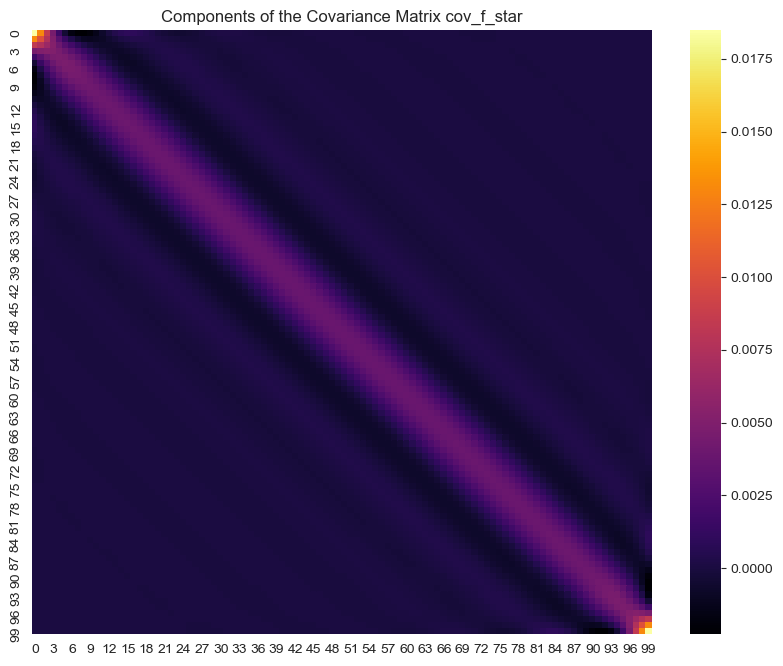

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

sb.heatmap(data=cov_f_star, cmap='inferno', ax=ax)

ax.set_title('Components of the Covariance Matrix cov_f_star')

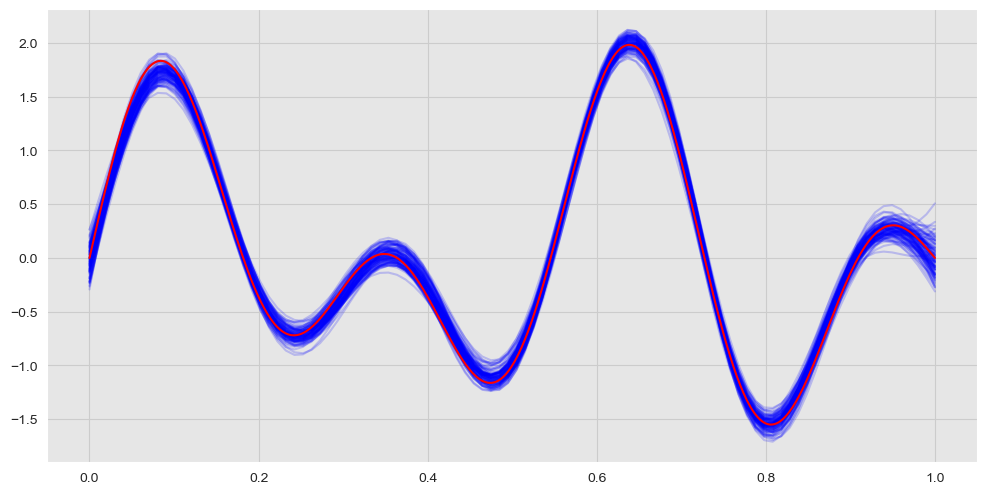

In [24]:
fig , ax = plt.subplots()

for i in range(0, 100):
    
    samples = np.random.multivariate_normal(mean = f_bar_star.squeeze(), cov = cov_f_star)
    
    sb.lineplot(x_s, samples, color= 'blue', alpha = 0.2, ax=ax)
    
sb.lineplot(x, f_x, color = 'red', ax=ax)

Reference:

1. [An Introduction to Gaussian Process Regression](https://juanitorduz.github.io/gaussian_process_reg/)